# Solutions Q8 - 13 

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()                 # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 14})  # set font size for plots

## Q8 answer
(a) There are six atoms in ethylene and therefore $3N - 6 = 12$ normal modes as the molecule is not linear. 

(b) You will need to consult a point group table, see www.molecule-viewer.com for tables and an explanation of the symmetry labels and elements. 

Looking at a D$_{2h}$ point group (below), IR active vibrations belong to symmetry species that transform as translations because the transition dipole in turn transforms in this way; these are B$_{1u}$, B$_{2u}$ and B$_{3u}$. The translations are found as $x,\; y$, or $z$ in the first column after the characters. Raman spectroscopy depends on a change in the shape of the molecule (_via_ the polarisability) and so transforms as squared terms in the point group, found in the right-hand column as $x^2,\, xy$ and so forth. Only A$_u$ has neither of these transformations.

![Drawing](series-d2h.png)

(c) The vibrational partition function is $ \displaystyle Z = e^{-h\nu/2k_BT}/(1 - e^{-h\nu/k_BT})$ and differentiating $\ln(Z)$ with respect to temperature to obtain the energy and multiplying by $k_BT^2$ and differentiating again gives the heat capacity $C_V$. This is the calculation for one vibrational mode. At the end the values for all $n$ modes will have to be added.

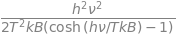

In [2]:
h, nu, kB, T = symbols('h, nu, kB, T')
Z = exp(-h*nu/(2*kB*T))/( 1 - exp(-h*nu/(kB*T)) )
f = simplify(kB*T**2*diff(ln(Z),T))
cv= diff(f,T) 
simplify(cv)

Using the definition of vibrational temperature the result simplifies to

$$\displaystyle C_V=k_B\left(\frac{\theta}{T}\right)^2\frac{e^{\theta/T}}{\left(e^{\theta/T} - 1\right)^2} = 
k_B\left(\frac{\theta}{T}\right)^2\frac{e^{\theta/T}}{e^{2\theta/T}-2e^{\theta/T} + 1} $$

By definition $\displaystyle \sinh(x) =(e^x-e^{-x})/2$ and to convert the exponentials to $\sinh$ multiply to and bottom by $\displaystyle e^{-\theta/T}$. This produces

$$\displaystyle C_v= k_B\left(\frac{\theta}{T}\right)^2\frac{1}{e^{\theta/T}-2+e^{-\theta/T} } $$

Next as $\displaystyle \sinh^2(x) =(e^2x-2+e^{-2x})/4$ and letting $\theta/2=x$ insert into $C_V$ to get

$$\displaystyle C_V= k_B\left(\frac{\theta}{2T}\right)^2\frac{1}{\sinh^2(\theta/2T)}$$

Because heat capacity is $dE/dT$ and the total heat capacity has three terms each of $k_B/2$ for translation and also for rotational motion, then in total for $n$ vibrational modes

$$\displaystyle C_V= 3k_B+k_B\sum_{i=1}^n\left(\frac{\theta_i/2T}{\sinh(\theta_i/2T)}\right)^2$$

(d)  Convert from $C_V$ to $C_p$ because experiments are done at constant pressure and an additional $k_B$ is added since $C_p = C_V + k_B$ per molecule. Because the frequencies are given in cm$^{-1}$, they must be converted to s$^{-1}$ by multiplying by the speed of light in cm s$^{-1}$. The vibrational frequencies, rather than vibrational temperatures, are put directly into the equations. The constants are collected into variable $a$ only to simplify the equations.

The calculation below uses a built in function (fsolve) and also the Newton-Raphson method which is accurate enough in this instance. Plotting the function can help in choosing a starting value when finding the root of the equation.

Unmeasurable frequency nu4  =  894.453 cm^{-1}
Result by Newton-Raphson
0  700.00000
1  840.21430
2  888.99056
3  894.39215
4  894.45292


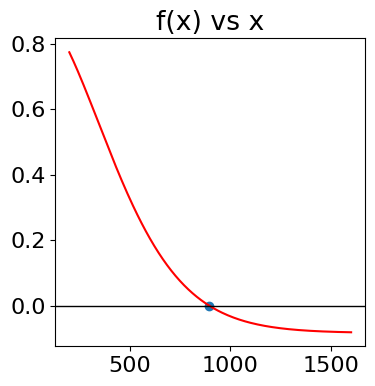

In [3]:
from scipy.optimize import fsolve                            # import fsolve
nu = [ 3019,1623,1342,3075,1236,949,943,3105, 810,2989,1443] # frequencies in wavenumbers
h  = 6.6256e-34      # J s
kB = 1.3805e-23      # J/K
c  = 2.9979e10       # cm/s
T  = 211.0           # K
a  = h*c/(2*kB*T)    # collect constants for simplicity

s = sum( [(a*nu[i]/np.sinh(a*nu[i]))**2 for i  in range(len(nu))])

def f(x):            # done this way to use fsolve
    y=  ( x*a/np.sinh(x*a) )**2 - (0.37 - s)
    return y

nu4 = fsolve(f,100) # 100 is initial guess
print('{:s}{:8.3f}{:s}'.format('Unmeasurable frequency nu4  = ', float(nu4),' cm^{-1}'  )) 

# by Newton -Raphson method  iteratively calculate x = x - f(x)/f'(x) .
f  = lambda x: ( x*a/np.sinh(x*a) )**2 - (0.37 - s)
df = lambda x: 2*a**2*x/np.sinh(a*x)**2-2*a**3*x**2*np.cosh(a*x)/np.sinh(a*x)**3 # derivative
print('{:s}'.format('Result by Newton-Raphson') )
x  = 700.0                # initial guess in cm^(-1)
x0 = 0
     
for i in range(20):       # guess max number of iteration; jump out when converged
    x0 = x - f(x)/df(x)
    print('{:d} {:10.5f}'.format(i,x) )
    if abs(x - x0) < 0.001:
        break
    x = x0
    pass

fig = plt.figure(figsize=(4,4))
plt.rcParams.update({'font.size': 16})  # set font size for plots
xx = np.linspace(200,1600,200)    
plt.plot(xx,f(xx),color='red') 
plt.axhline(0,color='black',linewidth=1)
plt.scatter([x],[0])
plt.title('f(x) vs x')
plt.show()

## Q9 answer
(a) The average energy at temperature $T$ is $\displaystyle \langle E \rangle =\frac{e^{-1/k_BT}}{1-e^{-1/k_BT}} = \frac{1}{e^{+1/k_BT}-1}$

At high temperatures the exponential terms can be expanded as a series; 

$$\displaystyle  e^{1/k_BT} = 1 + \frac{1}{k_BT} +  \frac{1}{2!(k_BT)^2} + \cdots $$

and as $k_BT$ is large the second and other terms can be ignored i.e.  $\displaystyle e^{+1/k_BT} \approx 1 + 1/k_BT$ and so the result is $\langle E \rangle = k_BT$.  At low temperature, the exponential terms become zero because $1/k_BT \gg 1$ and the average is zero. See the figure with the answer to question $7$.

(b) The average energy squared is

$$\displaystyle  \langle E^2 \rangle =\frac{\sum\limits_{E=0}^\infty E^2e^{-E/k_BT}}{\sum\limits_{E=0}^\infty e^{-E/k_BT}}  $$

The partition function is the same but the numerator is now more difficult to evaluate. This can be done by summing as $\displaystyle \sum n^2n^x$ and then substituting $\displaystyle E \equiv n,\; x=\exp(-1/k_BT)$. Using the computer algebra package SymPy gives the following result;

In [4]:
x, n = symbols('x, n')
s0 = Sum(n*n*x**n,(n,0,oo))
s0.doit()

⎧x⋅(-x - 1)              
⎪──────────   for │x│ < 1
⎪        3               
⎪ (x - 1)                
⎪                        
⎪  ∞                     
⎨ ___                    
⎪ ╲                      
⎪  ╲    2  n             
⎪  ╱   n ⋅x    otherwise 
⎪ ╱                      
⎪ ‾‾‾                    
⎩n = 0                   

and doing the same for the partition function gives

In [5]:
x, n = symbols('x, n')
s = Sum(x**n,(n,0,oo))
s.doit()

⎧   1                 
⎪ ─────    for │x│ < 1
⎪ 1 - x               
⎪                     
⎪  ∞                  
⎪ ___                 
⎨ ╲                   
⎪  ╲    n             
⎪  ╱   x    otherwise 
⎪ ╱                   
⎪ ‾‾‾                 
⎪n = 0                
⎩                     

thus the results is, in terms of x, $\displaystyle \langle E^2 \rangle = \frac{-x(x+1)}{(x-1)^2} =   -\frac{e^{-1/k_BT}(1+e^{-1/k_BT})}{(e^{-1/k_BT}-1)^2} =  \frac{1+e^{1/k_BT} }{ (e^{1/k_BT} -1)^2 }$

As can be seen from the plot below, $\langle E^2\rangle /k_BT  vs.  k_BT$ is almost linear except for small $k_BT$.  The limit is zero when $T\to 0$ and at large $T,\, \langle E^2\rangle /k_BT \to 2k_BT+1$

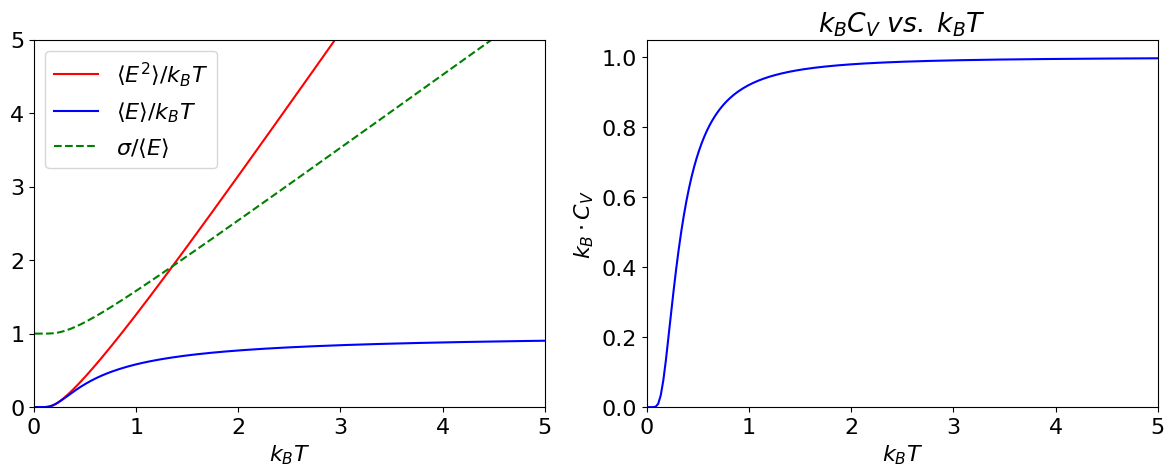

In [6]:
# calculate average energies and CV
fig1= plt.figure(figsize=(14.5, 10.5))
plt.rcParams.update({'font.size': 16})  # set font size for plots
ax0 = fig1.add_subplot(2,2,1)
ax1 = fig1.add_subplot(2,2,2)

fE2= lambda k_BT: ( 1.0 + np.exp(1.0/k_BT) )/( np.exp(1.0/k_BT) - 1.0 )**2  # <E^2> as function of k_BT not T
fE = lambda k_BT: ( np.exp(1.0/k_BT) - 1.0 )**(-1)                          # <E>
fCV= lambda k_BT: np.exp(1/k_BT)/((k_BT)**2*(np.exp(1/k_BT) - 1)**2)        # CV*kB      

numT  = 200
maxT  = 5
k_BT  = np.linspace(0.01,maxT, numT)
av_E2 = [ fE2(k_BT[i])/k_BT[i] for i in range(numT)]
av_E  = [ fE(k_BT[i])/k_BT[i] for i in range(numT)]
sigEE = [ fE(k_BT[i])*np.exp(1.0/k_BT[i])   for i in range(numT)]
CV     =[ fCV(k_BT[i])  for i in range(numT)]

ax0.plot(k_BT,av_E2,color='red',label=r'$\langle E^2 \rangle/k_BT$')
ax0.plot(k_BT,av_E,color='blue',label=r'$\langle E \rangle/k_BT$')
ax0.plot(k_BT, sigEE,color='green',linestyle='dashed',label= r'$\sigma/ \langle E\rangle$' )
ax0.set_xlabel(r'$k_BT$')
ax0.legend(loc='upper left')
ax0.set_ylim([0,5])
ax0.set_xlim([0,5])
ax1.plot(k_BT,CV,color='blue')
ax1.set_xlabel(r'$k_BT$')
ax1.set_ylabel(r'$k_B \cdot C_V$')
ax1.set_title(r'$k_B C_V \;vs.\; k_BT$')
ax1.set_xlim([0,5])
ax1.set_ylim([0,1.05])
plt.show()                                

Figure 19. Left: The mean energy $\langle E\rangle$, the mean of the energy squared $\langle E^2\rangle$ and standard deviation $\sigma/ \langle E\rangle$ vs $k_BT$. Right: Heat capacity vs $k_BT$ showing typical behaviour when there are a large number of levels being populated.
____

(c) The variance can now be written down using the average values just calculated;

$$\displaystyle  \sigma_E^2 =\langle E^2\rangle - \langle E\rangle^2 = \frac{e^{-1/kBT}}{(1-e^{-1/kBT})^2} $$

At low temperatures  $\sigma_E^2 \to 0$  because all the energy is in the lowest few levels and therefore is not spread about. When $T$ is large the variance increases with temperature and is $\sigma_E^2 = (k_BT)^2$. The normalized standard deviation is

$$\displaystyle  \frac{\sigma_E^2}{\langle E\rangle} = \frac{e^{1/kBT}}{e^{1/kBT}-1}$$

(d) At very low temperatures, as $T \to 0$, the ratio $\sigma_E/\langle E\rangle \to 1$ and the spread of energy levels is the same as the energy itself although this is small. Conversely, when $T \rightarrow \infty$ the ratio becomes infinity but this again means that the spread of energy is as large as the energy itself, and all energy levels are equally populated.

(e) Much of the hard work is now done and to find the heat capacity at constant volume $C_V$ requires differentiating the average energy with respect to temperature.

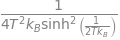

In [7]:
# use symbpy to differentiate C_V= dE/dT
k_B, T = symbols('k_B, T')
f = diff( exp(-1/(k_B*T))/(1 - exp(-1/(k_B*T))),T)
CV= simplify(f)
CV

By inspection of the previous result, the variance is $\sigma_E^2 = k_BT^2C_V$. The heat capacity, see figure above, is the rate of change of the energy with temperature. At low temperature only the lowest level is populated, so the rate of change is zero. As the temperature is increased, more energy is added to the molecules, more levels become populated and $C_V$ rapidly increases because the rate of change of energy is large. At high temperature, most levels are now populated and the rate of increase is small, and $C_V$ levels off becoming almost constant.

## Q10 answer
(a) Because $m=\pm 1/2$ the energy levels are equally spaced around zero energy; the energy gap is $\Delta E = E_{-1/2} - E_{+1/2} = \gamma \hbar B$. Using the quantities given in part (d) of the question  $\Delta E = 2.8 \cdot 10^{_-25}$ J and is far smaller than the average thermal energy at room temperature, $k_BT = 4.14 \cdot 10^{-21}$ J.

![Drawing](series-fig20.png)

Figure 20. This figure shows the values of the energy levels (left) when  based around zero, and (right) with the lowest level made to be zero.
____

(b) There are only two states to consider in the partition function, equation (11), and therefore it is tempting to write the average energy, where $E_m=-\gamma m\hbar B$, as

$$\displaystyle \langle E \rangle = \frac{\sum\limits_{m=-1/2}^{m=+1/2} E_me^{-E_m/k_BT}}{\sum\limits_{m=-1/2}^{m=+1/2} e^{-E_m/k_BT}} $$

but this is wrong. To see why we continue the calculation and for clarity we make the substitution $a=\gamma \hbar B/(2k_B)$. Expanding the summation produces 

$$\displaystyle \langle E \rangle =ak_B\frac{e^{-a/T}-e^{+a/T}}{e^{-a/T}+e^{+a/T}}$$
 
At low temperatures $\displaystyle e^{a/T}$ is large compared to the negative exponentials and thus as $T\rightarrow 0, \langle E \rangle \approx -\gamma \hbar B/2$ which is the energy of the lowest level. At the other limit as $T \approx \infty$ the term $a/T $ is small and the exponential can be expanded as $e^{\pm a/T}=1\pm a/T$ producing $\langle E \rangle \approx a^2k_B/T =(\gamma \hbar B)^2/(4k_BT)$. All this  seems to be correct so far, and as the temperature increases the average energy also tends towards zero, meaning that both levels are equally populated, also as expected. 
 
The expression for $\langle E^2 \rangle $ is 
 
$$\displaystyle \langle E^2 \rangle = \frac{\sum\limits_{m=-1/2}^{m=+1/2} E_m^2e^{-E_m/k_BT}}{\sum\limits_{m=-1/2}^{m=+1/2} e^{-E_m/k_BT}} $$

which evaluates to $\langle E^2 \rangle =(\gamma \hbar B)^2/4$, _which is incorrect_. This average must depend on temperature simply because at low temperatures all the nuclei are in the lowest energy level. 

The reason for this subtle error is that the energy levels are symmetrically disposed about zero and, when the energy is squared, the $m = -1/2$ and $m = +1/2$ levels have the same positive value in the summation. Perhaps, as a result, the value for $\langle E \rangle$ is also wrong; at this point we don't know if this is the case, so this is re-evaluated with the lowest energy set to zero.

### **Re-evaluation setting lowest level to zero energy**

Suppose the energy zero is moved to $-\gamma \hbar B/2$, by adding minus this amount to both energies as shown on the right hand side of figure 20 means that the summation is from $0 \to \gamma\hbar B$. The average energy now becomes

$$\displaystyle \langle E \rangle =  \frac{0\cdot e^{0/T} + \gamma \hbar Be^{-\gamma \hbar B/k_BT} }{e^{0/T}+e^{-\gamma \hbar B/k_BT}} = \frac{\gamma \hbar B}{1+e^{\gamma \hbar B/k_BT}} $$

which is the same result as before provided $-\gamma \hbar B/2$ is added because of the difference in where the zero of energy is set. The average of the squared energy is now

$$\displaystyle \langle E^2 \rangle = \frac{(\gamma \hbar B)^2e^{-\gamma \hbar B/k_BT}}{1+e^{-\gamma \hbar B/k_BT}} = \frac{(\gamma \hbar B)^2}{1+e^{+\gamma \hbar B/k_BT}} $$

which depends upon temperature as expected. 

The low temperature limits are calculated by expanding the exponential terms. This is easier to do by making the change $\beta = 1/k_BT$ giving 

$$\displaystyle \langle E \rangle =\frac{\gamma \hbar B}{1+e^{\gamma \hbar B \beta}}$$

When $T \approx 0$ then $\beta \approx \infty$ and the exponential also goes to infinity and $\langle E \rangle \to 0$  because $1/\infty = 0$. Similarly when $T \approx 0$, $\langle E^2 \rangle \to 0$. 

At high temperatures $\displaystyle \beta \to  0,\; \langle E \rangle _{\beta \to 0} \to \frac{\gamma \hbar B}{1+1+\gamma \hbar B\beta} \to \frac{\gamma \hbar B}{2} $ which is now midway between the two energy levels and $\displaystyle \langle E^2 \rangle \to \frac{(\gamma \hbar B)^2}{2} $. 

(c) The average energy at $10$ K is $\langle E \rangle = 1.400889 \cdot 10^{-25}$ J and $\langle E^2 \rangle = 3.92879 \cdot 10^{-50}$, and at $300$ K $\langle E \rangle = 1.4002267 \cdot 10^{-25}$ J and $\langle E^2 \rangle = 3.93284 \cdot 10^{-50}$. The very small difference at these two temperatures is because even at $10$ K both levels are significantly populated because the energy gap between nuclear spin levels is so small; recall that NMR frequencies are in the $100 \to 1000$ MHz range and that is only slightly higher than the FM radio frequency part of the spectrum. The normalised average energy, $\langle E \rangle /\gamma \hbar B$, is plotted below vs. temperature. The dotted curve shows the situation for a impossibly high magnetic field of $10B$, in this case $100$ T.

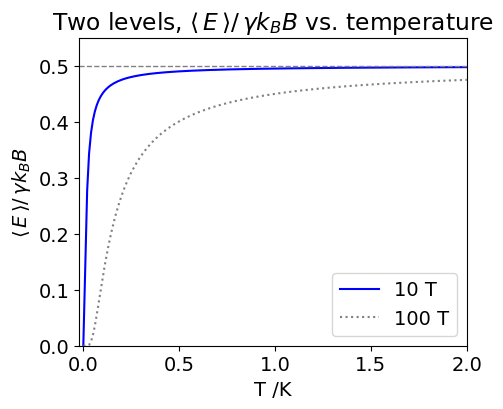

In [8]:
# Caluation of average energy vs temperature.
fig1= plt.figure(figsize=(5,4) ) 
plt.rcParams.update({'font.size': 14})  # set font size for plots
B    = 10                       # Tesla
g    = 26.4e7                   # magnetogyric ratio  radian Tesla Hz
hbar = 6.62607e-34/(2*np.pi)    # J s  h/(2 pi)
k_B  = 1.38065e-23              # J/K
maxT = 2                        # K
numT = 200                      # number of temperature points to plot
T = np.linspace(0.001,maxT,numT)

avE = lambda T,B : 1.0/(1.0 + np.exp( g*hbar*B/(k_B*T)) )    
    
plt.plot(T,avE(T,B),color='blue',label=str(B)+' T')
plt.plot(T,avE(T,10*B),color='grey',linestyle='dotted',label=str(10*B)+' T')
plt.axhline(0.5,linestyle = 'dashed',color='gray',linewidth=1)
plt.xlabel('T /K')
plt.ylabel(r'$\langle\, E\, \rangle /\,\gamma k_BB$')
plt.axis([-0.02,maxT,0,0.55])
plt.title(r'Two levels, $\langle\, E\, \rangle /\,\gamma k_BB$ vs. temperature')
plt.legend()
plt.show()

Figure 21. Change of the (dimensionless) average NMR $^1$H energy levels population with temperature. $B = 10$ T (blue line) and $100$ T (grey dotted line ) with $\gamma = 26.4\cdot 10^7\,\mathrm{rad\, Tesla^{-1}\, sec^{-1} }$.
____
From the figure it is noticed that even at $2$ K an almost equal population of spins are present because the average energy is $\approx 0.5$ and only two levels are present. The small difference between the populations of the two levels means that NMR spectroscopy is a relatively insensitive technique. However, this insensitivity is ameliorated by the fact that the macroscopic polarization can be measured because the nuclear spins are excited coherently. The NMR signal is proportional to the _sum squared_ of the individual magnetic moments rather than the _squared sum_, i.e. the measured signal is the sum $(\mu_1 + \mu_2 + \mu_3 + \cdots )^2$ rather than the sum $(\mu_1^2 + \mu_2^2 + \mu_3^2 + \cdots)$  the former being far larger than the latter. Try it with some numbers! 

## Q11 answer
(a) The total degeneracy for the $J^\mathrm{th}$ ortho level is $g(g+1)(2J+1)/2$ or $3(2J+1)$ as the spin is $1/2$ and $g=(2S+1)$ but is only $(2J + 1)$ for the para levels. The figure illustrates this.

![Drawing](series-fig22a.png)
____
To calculate each partition function, add either the odd (ortho) or the even (para) numbered rotational levels together as shown in the next calculation. The fraction of ortho is plotted vs temperature. 

check on size of exponential term to see if J is large enough 1.5936e-23
 % ortho at 300.0 K =    74.92
 % ortho at  20.4 K =   0.1692


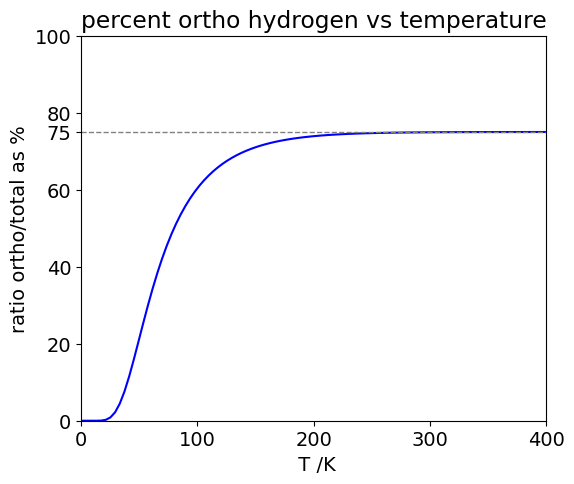

In [9]:
fig1= plt.figure(figsize=(6,5))
plt.rcParams.update({'font.size': 14})  # set font size for plots

B    = 60.8                 # rotational constant cm^(-1)
k_B  = 1.3805e-23*5.034e22  # Boltzmann constant in cm^(-1)
S    = 1/2
g    = 2*S + 1              # spin degeneracy
maxJ = 15                   # maximum J quantum number
print('{:s}{:g}'.format('check on size of exponential term to see if J is large enough ', np.exp(-B*maxJ*(maxJ+1)/(k_B*400))))

Z_para  = lambda T: (g*(g-1)/2)*sum([ (2*J+1)*np.exp(-B*J*(J+1)/(k_B*T) ) for J in range(0,15,2) ])
Z_ortho = lambda T: (g*(g+1)/2)*sum([ (2*J+1)*np.exp(-B*J*(J+1)/(k_B*T) ) for J in range(1,15,2) ])

T0 = 300                    # temperature
print('{:s}{:4.1f}{:s}{:8.4g}'.format(' % ortho at ',T0,' K = ', 100*Z_ortho(T0)/(Z_ortho(T0)+ Z_para(T0))))

T0 = 20.4
print('{:s}{:4.1f}{:s}{:8.4g}'.format(' % ortho at  ',T0,' K = ', 100*Z_ortho(T0)/(Z_ortho(T0)+ Z_para(T0))))

numT = 100   # number of points to plot
maxT = 400   # maximum temperature
T = np.linspace(1,maxT,numT)          # start at 1 to avoid division by zero
ratio= lambda T: Z_ortho(T)/(Z_ortho(T)+Z_para(T))

plt.plot(T, 100*ratio(T),color='blue')  # plot ratio
plt.axhline(75,linestyle='--',color='gray',linewidth=1)
plt.yticks([0,20,40,60,75,80,100])
plt.axis([0,maxT,0,100])
plt.ylabel('ratio ortho/total as %')
plt.xlabel(' T /K')
plt.title('percent ortho hydrogen vs temperature')
plt.show()

Figure 22b. The fraction of ortho- H$_2$ vs temperature assuming that no inter-conversion between the spin states occurs. The grey dashed line shows the 3:1 ratio. 
____
(b) In calculating the heat capacity of naturally occurring hydrogen add $3/4$ of the ortho- to $1/4$ of the para- molecules. Three significant figures is all that rotational constant $B$ or the temperature is given to, so this should be sufficient for the answer. The constant volume heat capacity is calculated using $\displaystyle U=k_BT^2 d\frac{\ln(Z)}{dT}$ , and $\displaystyle C_V =\frac{dU}{dT}$ for each spin state, with subscripts p for para and o for ortho.

The first step is to find the derivative which is awkward as $Z$ is a summation but easier using $\displaystyle \frac{d\ln(Z)}{dT}=\frac{1}{Z}\frac{dZ}{dT}$

where 

$$\displaystyle Z=\frac{g(g\pm 1)}{2}\sum(2J+1)e^{-BJ(J+1)/k_BT} =\frac{g(g\pm 1)}{2}\sum g_Je^{-E_J/k_BT} $$

where $E_J=BJ(J+1)$ and $g_J=2J+1$. The derivative in $T$ is easily seen as 

$$\displaystyle \frac{dZ}{dT}=\frac{g(g\pm 1)}{2}\frac{1}{k_BT^2}\sum E_Jg_Je^{-E_J/k_BT }=Z'$$

thus 

$$\displaystyle U=k_BT^2\frac{d\ln(Z)}{dT} =\frac{1}{Z}\frac{g(g\pm 1)}{2} \sum {E_Jg_Je^{-E_J/k_BT }}=\frac{Z'}{Z}$$

with the restriction that $J$ has to have the correct odd and even values. Notice the units here, $U$ is energy and as $\ln(Z)$ is dimensionless $k_BT^2d\ln(Z)/dT$ in units is $\equiv k_BT$, with units of energy, normally Joules.

The heat capacity $dU/dT$ is even nastier as the derivative is the ratio of two terms, however, it is easiest to do as a product, for example 

$$\displaystyle d(Z'Z^{-1})= \frac{Z'}{-Z^{2}}dZ +\frac{ 1}{ Z}dZ'$$

The derivative $dZ/dT$ has already been evaluated above, and 

$$\displaystyle \frac{dZ'}{dT}= \frac{g(g\pm 1)}{2} \frac{1}{k_BT^2}\sum {E_J^2g_Je^{-BJ(J+1)/k_BT }} =Z''$$

Substituting terms then

$$\displaystyle C_V= \left( \frac{Z''}{Z} - \left (\frac{Z'}{Z}\right)^2 \right) $$

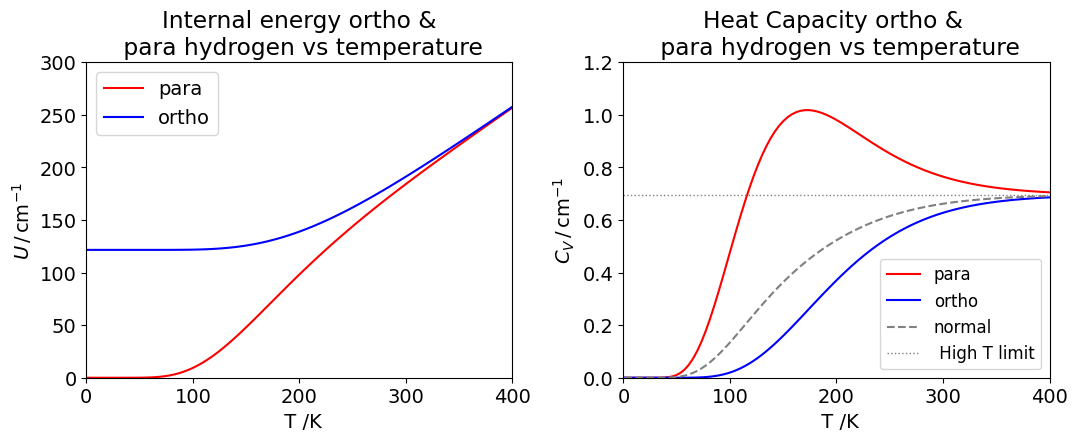

In [10]:
fig1= plt.figure(figsize=(11, 8))
ax0 = fig1.add_subplot(2,2,1)
ax1 = fig1.add_subplot(2,2,2)

B    = 60.8                 # rotational constant cm^(-1)
k_B  = 1.3805e-23*5.034e22  # Boltzmann constant in cm^(-1)
S    = 0.5                  # spin 1/2
g    = 2*S + 1              # degeneracy
maxJ = 15

# Z is the partition funcion , Z' is Z'' as defined in the text.

E = lambda J: B*J*(J+1)
Z_p  =     lambda T: (g*(g-1)/2.0)*sum([        (2*J+1)*np.exp(-E(J)/(k_B*T) ) for J in range(0,maxJ,2) ]) # Z
Zdash_p =  lambda T: (g*(g-1)/2.0)*sum([E(J)*   (2*J+1)*np.exp(-E(J)/(k_B*T) ) for J in range(0,maxJ,2) ]) # Z'
Zddash_p = lambda T: (g*(g-1)/2.0)*sum([E(J)**2*(2*J+1)*np.exp(-E(J)/(k_B*T) ) for J in range(0,maxJ,2) ]) # Z''

Z_o  =     lambda T: (g*(g+1)/2.0)*sum([        (2*J+1)*np.exp(-E(J)/(k_B*T) ) for J in range(1,maxJ,2) ])
Zdash_o =  lambda T: (g*(g+1)/2.0)*sum([E(J)*   (2*J+1)*np.exp(-E(J)/(k_B*T) ) for J in range(1,maxJ,2) ])
Zddash_o = lambda T: (g*(g+1)/2.0)*sum([E(J)**2*(2*J+1)*np.exp(-E(J)/(k_B*T) ) for J in range(1,maxJ,2) ])

numT  = 100
maxT  = 400.0
T  = np.linspace(1,maxT,numT)        # temperature range
Up = lambda T: Zdash_p(T)/Z_p(T)     # internal energy para         
Uo = lambda T: Zdash_o(T)/Z_o(T)
Cvp= lambda T: (1.0/( k_B*T**2 ))*( Zddash_p(T)/Z_p(T) - (Zdash_p(T)/Z_p(T))**2 ) # CV para
Cvo= lambda T: (1.0/( k_B*T**2 ))*( Zddash_o(T)/Z_o(T) - (Zdash_o(T)/Z_o(T))**2 )

ax0.plot(T,Up(T),color='red',label='para')
ax0.plot(T,Uo(T),color='blue',label='ortho')

ax0.set_xlim([0,maxT])
ax0.set_ylim([0,300])
ax0.set_ylabel(r'$U\,/\,\mathrm{cm^{-1}}$')
ax0.set_xlabel(' T /K')
ax0.set_title('Internal energy ortho &\n para hydrogen vs temperature')
ax0.legend()

ax1.plot(T,Cvp(T),color='red' , label='para' )
ax1.plot(T,Cvo(T),color='blue', label='ortho')
ax1.plot(T,Cvp(T)*0.25+Cvo(T)*0.75,  color='gray',linestyle='dashed',label='normal')

ax1.axhline(k_B,color='gray',linestyle='dotted',label=' High T limit',linewidth=1)
ax1.set_ylim([0,1.2])
ax1.set_xlim([0,maxT])
ax1.set_ylabel(r'$C_V\,/\,\mathrm{cm^{-1}}$')
ax1.set_xlabel(' T /K')
ax1.set_title('Heat Capacity ortho & \n para hydrogen vs temperature')

ax1.legend(fontsize=12)
plt.tight_layout()
plt.show()

Figure 23 Left: Internal energy (in cm$^{-1}$) for ortho- and para- hydrogen. Right: Heat capacity $C_V$ in cm${-1}$ K$^{-1}$ at constant volume.The natural or normal H curve consists of the equilibrium mixture of $3/4$ ortho- and $1/4$ para- molecules. The horizontal line is the classical or high temperature limit to the heat capacity per molecule and is $k_B = 0.694\,\mathrm{ cm^{-1}}$.
____

The heat capacity is the rate of change of internal energy with temperature. At high temperatures, most energy levels are populated, so the rate of change is small and the heat capacity becomes almost constant with temperature. At zero temperature, only the lowest accessible levels are populated, which have $J$ = 0 for the para hydrogen and $J = 1$ for ortho- hydrogen, and the heat capacity is then zero for both types of molecule.

This may also be seen in the plot of internal energy, which is horizontal for both spin states at low temperature as the slope of $U$ vs $T$ is zero. Similarly, at high temperatures, the slopes are the same and constant, which produces a constant heat capacity. As the temperature increases, the rate of change of internal energy increases and so does the heat capacity. The internal energy of para-species increases slowly at first, then the slope becomes less at about $230$ K and this is past the maximum in the heat capacity. The ortho - curve has internal energy whose slope increases uniformly with temperature.

(c) The ortho - hydrogen has energy in the $J=1$ level at zero K and mostly in this level at $20.4$ K, the normal boiling point, because the $J = 1$ level has an energy of $121.6\,\mathrm{ cm ^{-1}}$ . If this energy was released suddenly and all the molecules became para-hydrogen, $2B = 121.6\,\mathrm{ cm^{-1}}$ would be released per molecule which is $\approx 1450\,\mathrm{ J\, mol^{-1}}$. As the heat of vaporization is only $904\,\mathrm{ J\, mol^{-1}}$ the whole of the hydrogen would boil away. Clearly, this is to be avoided, and manufacturers always promote the ortho- to para- conversion with a catalyst before supplying liquid hydrogen. It is not possible chemically to catalyse para into ortho - hydrogen so the pure ortho - curve in the figure cannot be measured.

**Exercise:** Repeat the calculation with $\mathrm{D_2}$ which has $S = 1$ nuclei. In this case, $g = 3$ and the nuclear spin states are symmetrical. This leads to an interchange of the $J = 0, 2, \cdots$ with $J = 1, 3, \cdots$ states in the summation of the partition functions compared to $\mathrm{H_2}$.

## Q12 answer
(a) $1/4^n$ is the chance (probability) that the word is read, and hence $1 - 1/4^n$ that it is not read and this happens $ L - 1$ times so the probability of not being read is raised to this power.

(b) If the distribution is normalized then $ \sum_{L=0}^\infty (1-1/4^n)^{L-1}(1/4^n)=1$ and if $x=1/4^n$ then the sum is $x\sum_{L=0}^\infty (1-x)^{L-1}$. As $x \lt 1$ the summation is valid as shown by SymPy

In [11]:
x, L = symbols('x, L')
f01= x*Sum((1-x)**(L-1),(L,0,oo))
simplify(f01.doit() )

⎧       -1                            
⎪      ─────         for x > 0 ∧ x < 2
⎪      x - 1                          
⎪                                     
⎪     ∞                               
⎪    ___                              
⎪    ╲                                
⎨     ╲          L                    
⎪-x⋅  ╱   (1 - x)                     
⎪    ╱                                
⎪    ‾‾‾                              
⎪   L = 0                             
⎪──────────────────      otherwise    
⎪      x - 1                          
⎩                                     

The sum is $x\sum_{L=0}^\infty (1-x)^{L-1}= 1/(1-x)$ and as this distribution is not normalised when calculating the average length $\langle L \rangle$ the denominator must be included.

(c) The average length is found by using the standard formula;

$$\displaystyle  \langle L \rangle = \frac{ \sum\limits_{L=0}^\infty L(1-4^{-n} )^{L-1} 4^{-n} }{ \sum\limits_{L=0}^\infty (1-4^{-n} )^{L-1} 4^{-n} }$$
and making the substitution $x=1/4^n$ and simplifying gives a clearer sum 

$$\displaystyle  \langle L \rangle = \frac{ \sum\limits_{L=0}^\infty L(1-x )^{L-1} }{ \sum\limits_{L=0}^\infty (1-x )^{L-1} }$$

evaluating the numerator 

In [12]:
x, L = symbols( 'x, L')
f01 = Sum(L*(1-x)**(L-1), (L,0,oo))  # note capital S
f01.doit()

⎧     1 - x                       
⎪     ─────        for │x - 1│ < 1
⎪        2                        
⎪       x                         
⎪                                 
⎪  ∞                              
⎨ ___                             
⎪ ╲                               
⎪  ╲            L                 
⎪  ╱   L⋅(1 - x)      otherwise   
⎪ ╱                               
⎪ ‾‾‾                             
⎩L = 0                            
──────────────────────────────────
              1 - x               

therefore the average is $\displaystyle \langle L \rangle = \frac{1-x}{x}$. Because $x$ is small compared to unity then  $\langle L \rangle \approx 1/x = 4^n $ and the average length of cut DNA strands is therefore approximately $256, 4096$, or $65536$ base pairs long depending on whether the enzyme cuts out $n = 4, 6$, or $8$ base pairs.

## Q13 answer
Letting $c = 0$ makes the second solution infinity because $c$ is in the denominator. It is also in the numerator of the first term. The correct solution is to expand the exponential and look at the case when $c$ is small, i.e. in the limit when $ c \to  0$. This results in

$$\displaystyle y= \frac{hc^2+g(ct-(ct)^2/2 +(ct)^3/6 - \cdots )}{c^2}-\frac{gt}{c}$$

Dividing by $c$ gives $y=h+g(t/c -t^2/2 + ct^3/6 -\cdots)-gt/c $ and when $c \to 0$ the result is $y=-gt^2/c +h$.